# Linear Regression

* The goal of regression tasks is to predict a continuous variable (known as the **predictor**/**output**), $\widehat{y}$, based on some input $\mathbf{x}$.

* If there is a single input, $x$, then the equation takes the form: $\widehat{y}=w_{0}+w_{1}x$, where $w_{0}, w_{1}$ are constants known as the **weights**.

* If there are mutliple inputs, then the equation takes the form: $$\widehat{y}=w_{0}+w_{1}x_{1}+w_{2}x_{2}+\ldots+w_{n}x_{n}$$

* In the language of linear algebra, this can we written as $$\widehat{y}=\mathbf{w}^{\intercal}\mathbf{x}$$, where $\mathbf{w}$ is the weight vector, and $\mathbf{x}$ is the feature vector.

# The Challenge

* **Metroville**, a fast-growing mid-sized city, faced a housing crisis in 2025.
First-time buyers were overwhelmed. Real estate agents struggled to price homes accurately. Banks needed reliable valuations for mortgages.
* "How do we know what a house is really worth?"
— Sarah Chen, Lead Data Scientist at UrbanAnalytics Inc.
* The city had no centralized, data-driven pricing model. Listings were based on gut feel, outdated comps, or over-optimized Zillow-like algorithms that buyers distrusted.

# The Mission

* UrbanAnalytics was hired to create a transparent, interpretable, and accurate house price predictor using multilinear regression — a model realtors, buyers, and banks could understand and trust.

* **Goal:** Predict house prices within ±$30,000 (MAE) using 11 key features.

# Data Dictionary

| **Feature**               | **Real-World Logic**                                      |
|---------------------------|-----------------------------------------------------------|
| `size_sqft`               | **Primary driver** — bigger = more expensive              |
| `bedrooms`, `bathrooms`   | **Family homes** command premium                          |
| `dist_to_center_miles`    | **Proximity to jobs** = higher value                      |
| `school_rating`           | Parents pay **10–20% more** for top schools               |
| `neighborhood_tier`       | **Social signal + safety** premium                        |
| `recently_renovated`      | **Fresh kitchens/baths** = instant uplift                 |

# Importing the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('house_prices_dataset.csv')
df.head()

,size_sqft,bedrooms,bathrooms,age,lot_size_sqft,dist_to_center_miles,has_garage,school_rating,year_built,recently_renovated,neighborhood_tier,price
0,2437,4,2.0,42,12175,0.812648,1,5,1983,0,3,2000000
1,1890,4,2.5,102,18514,7.281926,1,8,1923,0,3,2000000
2,2589,4,2.0,7,16493,7.615018,1,5,2018,0,2,2000000
3,3674,4,2.5,87,12856,10.158221,1,8,1938,0,3,2000000
4,1819,3,1.0,14,9512,11.882087,1,6,2011,0,2,1079363


# Data Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

X = df.drop('price', axis=1) # features / independent variables
y = df['price'] # output variable / dependent variable

# Feature scaling (important for coefficient interpretation and stability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for interpretability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Splitting the Data into Training and Testing Datasets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 800, Test size: 200


# Model Building

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"Mean Absolute Error (MAE):  ${mae:,.0f}")
print(f"Root Mean Squared Error:    ${rmse:,.0f}")
print(f"R² Score:                   {r2:.4f}")

# Cross-validation (5-fold)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validated R²:         {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


MODEL PERFORMANCE
Mean Absolute Error (MAE):  $242,915
Root Mean Squared Error:    $287,121
R² Score:                   0.7513
Cross-Validated R²:         0.7613 ± 0.0135


# Extracting Model Coefficients / Weights

In [11]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE (Absolute Coefficients)")
print("="*50)
print(coef_df.round(4))


FEATURE IMPORTANCE (Absolute Coefficients)
                 Feature  Coefficient
5   dist_to_center_miles -289077.9629
0              size_sqft  151976.4281
10     neighborhood_tier  134266.8139
7          school_rating  117013.9910
2              bathrooms   66691.8442
1               bedrooms   63806.0771
4          lot_size_sqft   49872.8957
6             has_garage   40143.0031
3                    age  -31032.8105
8             year_built   31032.8105
9     recently_renovated   22770.5132


# Model Visualizations

/tmp/ipython-input-3099752817.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Coefficient', y='Feature', palette='viridis')


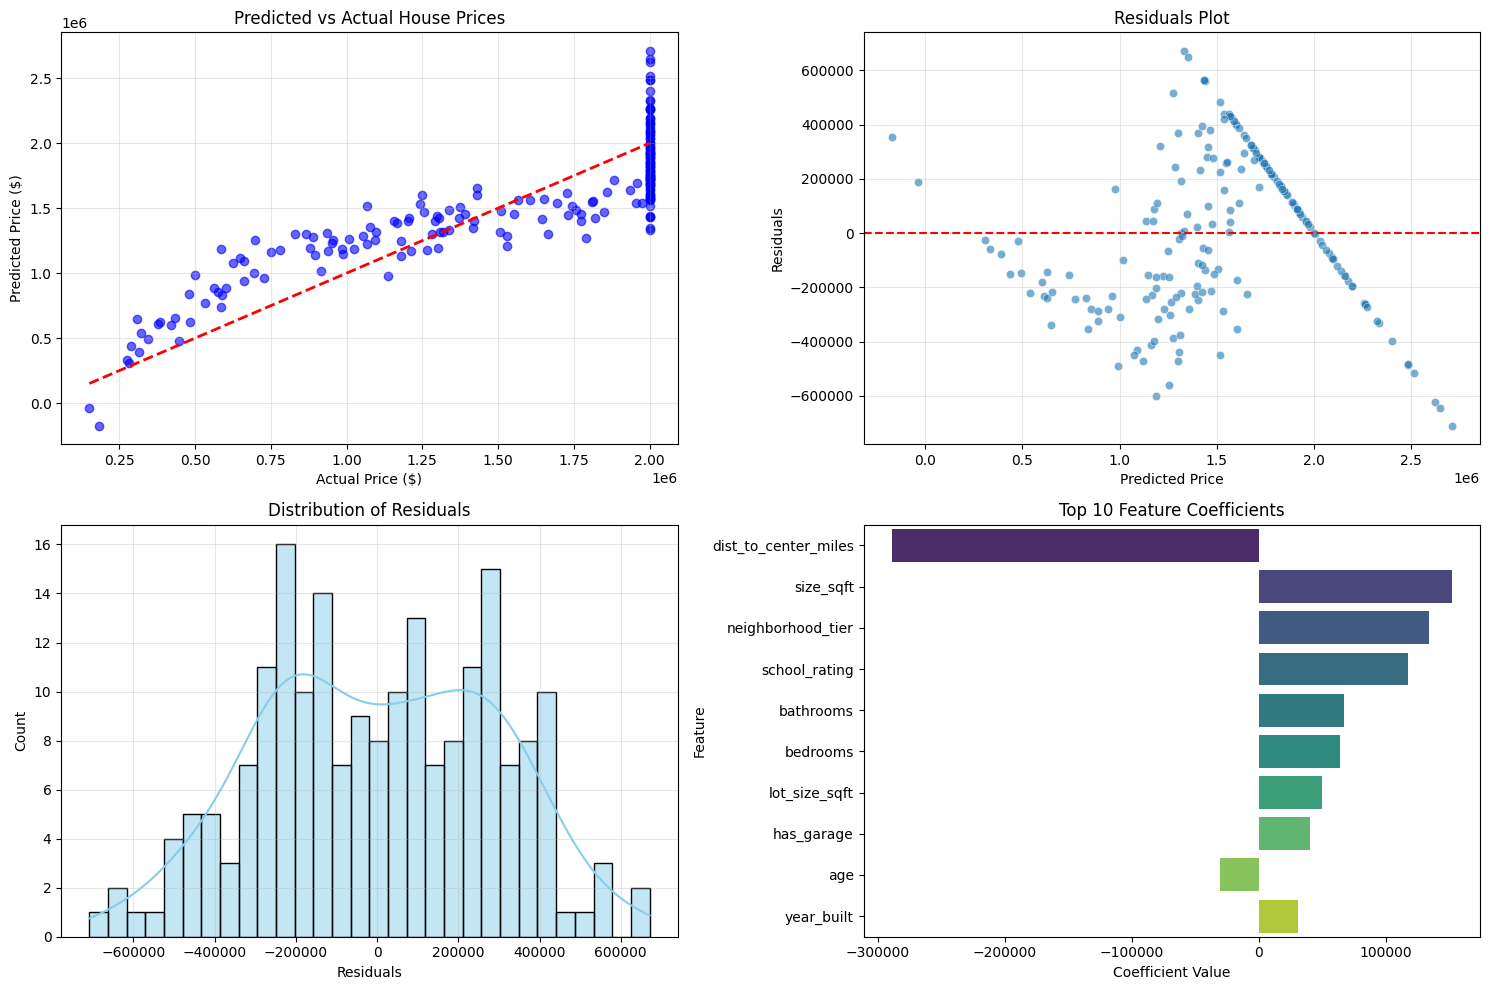

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 1. Predicted vs Actual
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Predicted vs Actual House Prices")
plt.grid(True, alpha=0.3)

# 2. Residuals Plot
residuals = y_test - y_pred
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(True, alpha=0.3)

# 3. Distribution of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.grid(True, alpha=0.3)

# 4. Feature Importance Bar Plot
plt.subplot(2, 2, 4)
top_features = coef_df.head(10)
sns.barplot(data=top_features, x='Coefficient', y='Feature', palette='viridis')
plt.title("Top 10 Feature Coefficients")
plt.xlabel("Coefficient Value")

plt.tight_layout()
plt.show()

# Saving the Model

In [13]:
import joblib

joblib.dump(model, 'house_price_model.pkl')
joblib.dump(scaler, 'house_price_scaler.pkl')
print("\nModel and scaler saved as 'house_price_model.pkl' and 'house_price_scaler.pkl'")


Model and scaler saved as 'house_price_model.pkl' and 'house_price_scaler.pkl'


# Making Predictions on New Data

In [7]:
print("\n" + "="*50)
print("EXAMPLE: Predict price for a new house")
print("="*50)

# Example new house
new_house = pd.DataFrame([{
    'size_sqft': 10000,
    'bedrooms': 6,
    'bathrooms': 2.5,
    'age': 10,
    'lot_size_sqft': 8000,
    'dist_to_center_miles': 8.0,
    'has_garage': 1,
    'school_rating': 3,
    'year_built': 2015,
    'recently_renovated': 1,
    'neighborhood_tier': 10
}])

# Scale using the same scaler
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)[0]

print(f"Predicted Price: ${predicted_price:,.0f}")


EXAMPLE: Predict price for a new house
Predicted Price: $4,580,543


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
